# Data Science & Business Analytics intern at The Sparks Foundation
### Author: Narmada Ugale

# Task 1 : Prediction Using Supervised ML

# ## Problem Statement : 
#### **Predict the percentage of an student based on the no. of study hours.**

* Algorithm Type: Supervised 
* Language Used: Python
* Algorithm Used: Linear Regression 

### What is Linear Regression is ?
#### LinearRegression, in its simplest form, fits a linear model to the data set by adjusting a set of parameters in order to
                       ## make the sum of the squared residuals of the model as small as possible

# 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data_set = pd.read_csv(url)
print("Data imported successfully")

data_set.head(10)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Viewing **bottom** 5 Records

In [4]:
data_set.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#Checking the size of dataset using shape
# shape: returns a tuple with each index having the number of corresponding elements.

In [5]:
data_set.shape



(25, 2)

#checking any null value in dataset



In [6]:
data_set.isnull().sum()


Hours     0
Scores    0
dtype: int64


#Sorting the dataset in Ascending order
#sort_values(): Pandas sort_values() function sorts a data frame in Ascending or Descending order of passed Columns.

In [7]:
data_set.sort_values(by=['Scores','Hours'],ascending= True, inplace=False)

,Hours,Scores
14,1.1,17
5,1.5,20
0,2.5,21
17,1.9,24
9,2.7,25
2,3.2,27
16,2.5,30
20,2.7,30
4,3.5,30
22,3.8,35


# 3. Declaring Variable and ploting Scatter plot of Hours vs Scores

#storing the values of Hours and scores in x and y

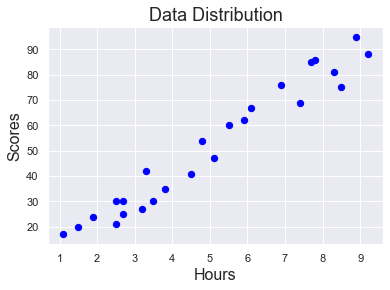

In [8]:
x=data_set['Hours']
y=data_set['Scores']

#ploting scatter plot of given dataset

plt.scatter(x,y,color="blue",marker="o",s=40)
plt.title('Data Distribution',fontsize=18)
plt.xlabel('Hours',fontsize=16)
plt.ylabel('Scores',fontsize=16)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# 5. Plotting Histogram of Score

# Plotting histogram of 'Score'

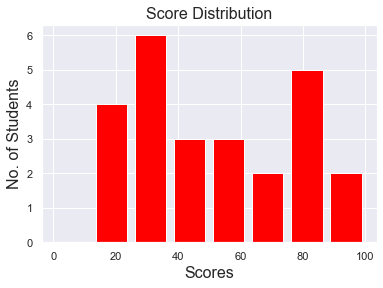

In [9]:
range=(0,100)
bins=8
plt.hist(y,bins,range,color='red', histtype='barstacked',rwidth=0.8)

plt.xlabel('Scores', fontsize= 16)
plt.ylabel('No. of Students', fontsize=16)
plt.title('Score Distribution',fontsize=16)

plt.show()

# 6. Plotting Histogram of Hours

# Plotting histogram of 'Hours'

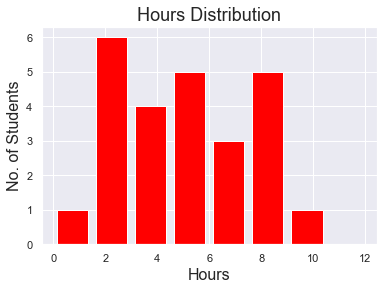

In [10]:
range=(0,12)
bins=8
plt.hist(x,bins,range,color='red', histtype='barstacked',rwidth=0.8)

plt.xlabel('Hours',fontsize=16)
plt.ylabel('No. of Students',fontsize=16)
plt.title('Hours Distribution',fontsize=18)

plt.show()

#As we see in " Data Distribution " Graph that there is a Linear Relationship between study Hours and student Score . 
#So, we can say that Linearity is present in Data and we can apply Linear Regression in it.

# 7. Reshaping the x and y variable 

#reshape the x and y variable and storing it into X and Y respectively.
# .reshape(): Gives a new shape to an array without changing its data.

In [11]:
X=x.values.reshape(-1,1)
Y=y.values.reshape(-1,1)

In [ ]:
# 8. Splitting the dataset intoTraining and Testing Data and Performing Regression

#splitting the Dataset 
# Where,
#  1. X and Y : Arrays
#  2. test_sizefloat or int, default=None
#           If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
#           If int, represents the absolute number of test samples. 
#           If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
#  3. random_state:Controls the shuffling applied to the data before applying the split. 
#                  Pass an int for reproducible output across multiple function calls

In [12]:
x_train ,x_test ,y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=70)

for checking shape of x_train,x_test,y_train & y_test

In [13]:
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(20, 1)
(5, 1)
(20, 1)
(5, 1)


#Performing Linear Regression

In [14]:
std_reg=LinearRegression()
std_reg.fit(x_train,y_train)
print("------------------------------ Model Training Completed -----------------------------------")

------------------------------ Model Training Completed -----------------------------------


#As model is Trained successfull .
# Now , appling LR equation

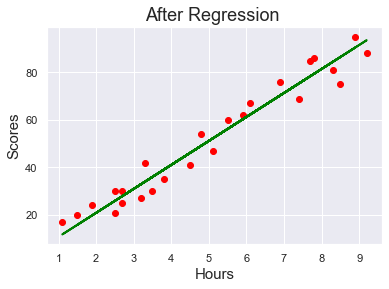

In [15]:
lmodel=std_reg.coef_*X + std_reg.intercept_

# Plotting the Regression Graph 

plt.scatter(X,Y, color='red')
plt.plot(X,lmodel, c='green', lw=2)
plt.title('After Regression ', fontsize=18)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.show()

#As we see that Regression line is fitting the data in best way possible

# 9. Predicting values with model and comparing with Observed Values/ Actual values

# .predict(): predict the predicted value of data

In [16]:
y_predict = std_reg.predict(x_test)

# Creating Observed Score DataFrame 

df=pd.DataFrame(y_test,columns=['Observed Scores '])
df
df['Predicted Scores']=y_predict
df

,Observed Scores,Predicted Scores
0,75,86.467686
1,85,78.395279
2,20,15.834124
3,24,19.870328
4,62,60.232363


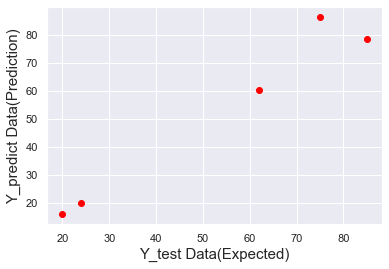

In [17]:
# Ploting test score against predited score 

plt.scatter(y_test,y_predict, color = 'red')
plt.xlabel('Y_test Data(Expected)',fontsize=15)
plt.ylabel('Y_predict Data(Prediction)',fontsize=15)
plt.show()


# Now what will be the predicted score of student after studying 9.25 hr/day? 
# Predicting score of student if he/she study for 9.25 hr/day

In [18]:
hours=[[9.25, ]]
our_prediction=std_reg.predict(hours)

print("------------Testing the Model on bases of Given Hours------------ \n----------- HERE WE GET------------")


print("For Given Hours = {}".format(hours))
print("Predicted Score = {}".format(our_prediction[0]))

------------Testing the Model on bases of Given Hours------------ 
----------- HERE WE GET------------
For Given Hours = [[9.25]]
Predicted Score = [94.03556733]



# 10.Evaluation model

# Calculating Root mean squared error

In [19]:
from sklearn.metrics import mean_squared_error

#mse= mean squared error

mse =  mean_squared_error(y_test,y_predict)

#rmse= root mean squared error

rmse=np.sqrt(mse)
print(mse)
print(rmse)

42.53268217557492
6.521708531939688


In [20]:
# Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error

# mean= mean absolute error

mean=mean_absolute_error(y_test,y_predict)
print("Now, Mean Absolute Error->" , mean)

# Calculating R-squared 
print("R-2", std_reg.score(x_test,y_test))


Now, Mean Absolute Error-> 5.627118338176114
R-2 0.9395636549738904


R-2 gives the score of Model Fit and in this case 93.95% score of testing data indicates that above fitted Model is A GOOD MODEL

Conclusion
I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.
From the above Prediction Model, we can say that the Predicted Score if a student studies for 9.25 hours/day is 94.03
Thank You